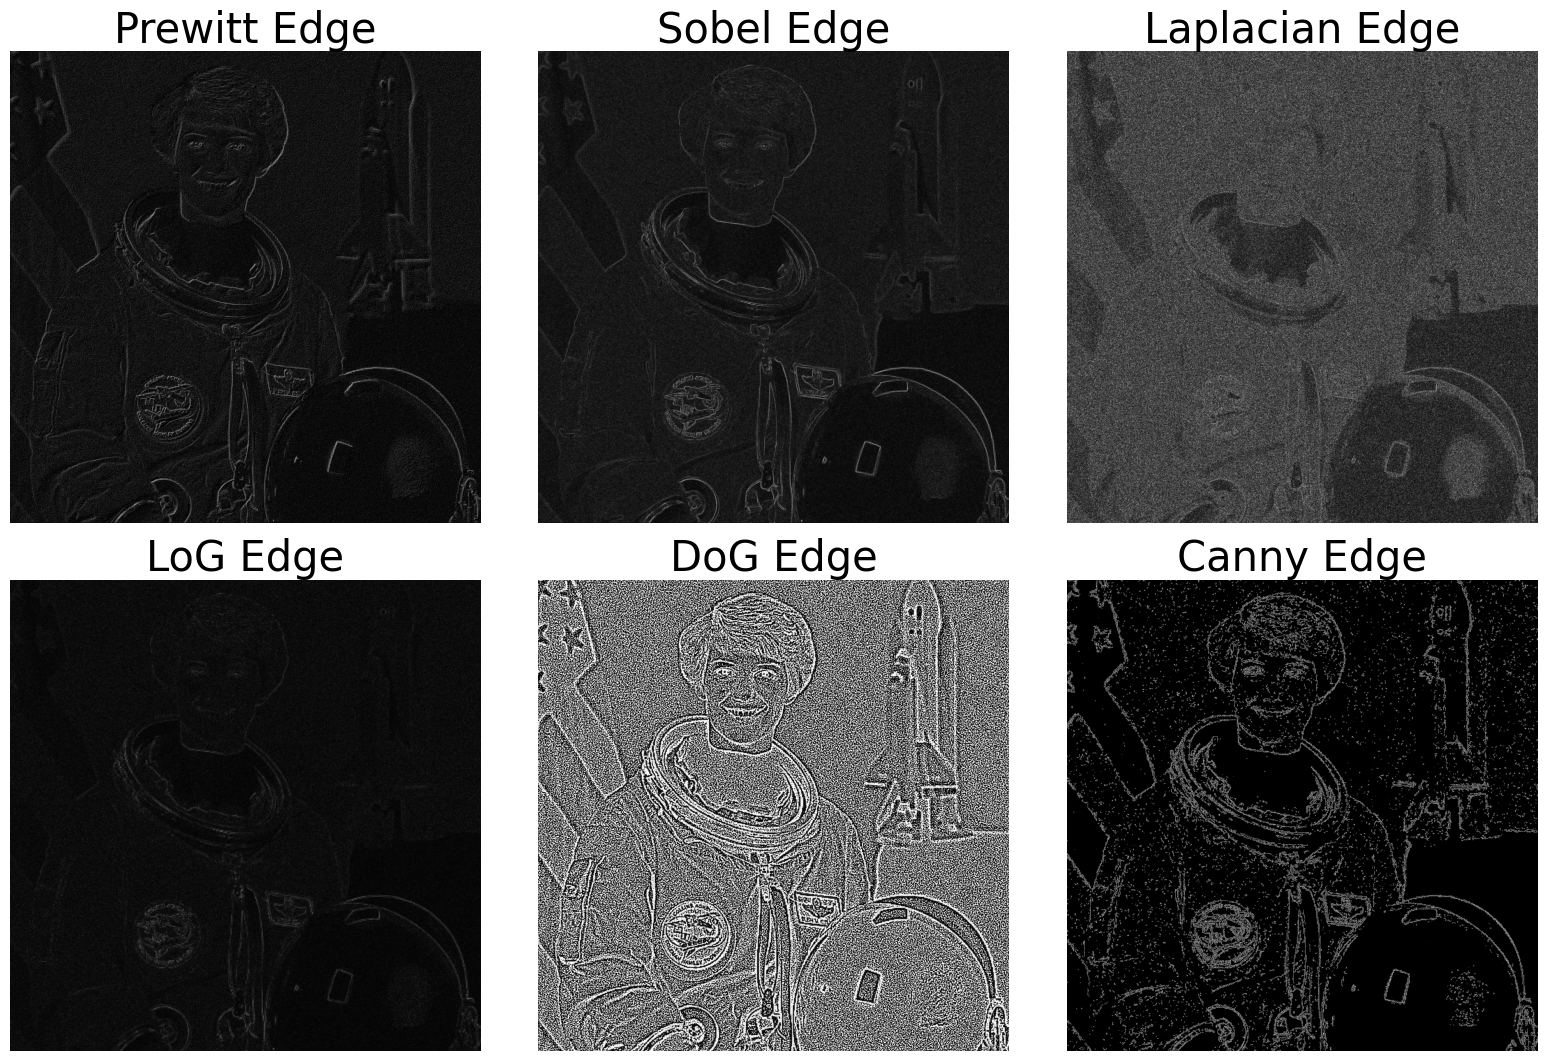

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기 (흑백 이미지로 변환)
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# 1. 프리윗 엣지 검출 (Prewitt)
Gx = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
Gy = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
edge_x = cv2.filter2D(image, -1, Gx)
edge_y = cv2.filter2D(image, -1, Gy)
prewitt_edges = cv2.addWeighted(edge_x, 0.5, edge_y, 0.5, 0)

# 2. 소벨 엣지 검출 (Sobel)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# 3. 라플라시안 엣지 검출 (Laplacian)
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian_abs = np.abs(laplacian).astype(np.uint8)

# 4. LoG 엣지 검출 (Laplacian of Gaussian)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
log = cv2.Laplacian(blurred_image, cv2.CV_64F)
log_abs = np.abs(log).astype(np.uint8)

# 5. DoG 엣지 검출 (Difference of Gaussian)
blurred_image_1 = cv2.GaussianBlur(image, (5, 5), 0)
blurred_image_2 = cv2.GaussianBlur(image, (15, 15), 0)
dog = blurred_image_1 - blurred_image_2
dog_abs = np.abs(dog).astype(np.uint8)

# 6. Canny 엣지 검출
canny_edges = cv2.Canny(image, 150, 300)

# 폰트 사이즈
fs = 30

# 결과 출력
plt.figure(figsize=(16, 16))

plt.subplot(3, 3, 1)
plt.title("Prewitt Edge", fontsize=fs)
plt.imshow(prewitt_edges, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title("Sobel Edge", fontsize=fs)
plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title("Laplacian Edge", fontsize=fs)
plt.imshow(laplacian_abs, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title("LoG Edge", fontsize=fs)
plt.imshow(log_abs, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title("DoG Edge", fontsize=fs)
plt.imshow(dog_abs, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title("Canny Edge", fontsize=fs)
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()